In [14]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


In [15]:
wine_data = pd.read_csv("/content/Wine.csv")

In [21]:
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [22]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               168 non-null    float64
 1   Malic_Acid            168 non-null    float64
 2   Ash                   168 non-null    float64
 3   Ash_Alcanity          168 non-null    float64
 4   Magnesium             168 non-null    int64  
 5   Total_Phenols         168 non-null    float64
 6   Flavanoids            168 non-null    float64
 7   Nonflavanoid_Phenols  168 non-null    float64
 8   Proanthocyanins       168 non-null    float64
 9   Color_Intensity       168 non-null    float64
 10  Hue                   168 non-null    float64
 11  OD280                 168 non-null    float64
 12  Proline               168 non-null    int64  
 13  Customer_Segment      168 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.7 KB


In [23]:
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,13.033214,2.343571,2.369226,19.361310,98.779762,2.273988,2.010298,0.362679,1.553155,5.116726,0.951226,2.596607,752.875000,1.934524
std,0.793084,1.097823,0.243202,3.118708,12.560477,0.627890,0.985189,0.123940,0.529569,2.243267,0.220522,0.714607,319.272211,0.790209
min,11.410000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.370000,1.610000,2.230000,17.175000,88.000000,1.700000,1.097500,0.270000,1.235000,3.292500,0.787500,1.905000,501.500000,1.000000
50%,13.060000,1.870000,2.360000,19.250000,97.500000,2.265000,2.100000,0.340000,1.505000,4.850000,0.960000,2.775000,675.000000,2.000000
75%,13.695000,3.105000,2.542500,21.500000,106.250000,2.800000,2.885000,0.430000,1.870000,6.262500,1.112500,3.170000,1016.250000,3.000000
max,14.830000,5.650000,2.920000,28.500000,136.000000,3.880000,3.930000,0.660000,2.960000,11.750000,1.450000,4.000000,1680.000000,3.000000


In [24]:
wine_data.shape

(168, 14)

In [25]:
wine_data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [26]:
wine_data.dtypes

,0
Alcohol,float64
Malic_Acid,float64
Ash,float64
Ash_Alcanity,float64
Magnesium,int64
Total_Phenols,float64
Flavanoids,float64
Nonflavanoid_Phenols,float64
Proanthocyanins,float64
Color_Intensity,float64


In [16]:
print("Missing values in each column:\n", wine_data.isnull().sum())

Missing values in each column:
 Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64


In [27]:
wine_data.duplicated().sum()

0

In [28]:
wine_data.drop_duplicates(inplace=True)

In [17]:
wine_data = wine_data.dropna()

In [18]:
z_scores = np.abs(stats.zscore(wine_data.drop(columns=["Customer_Segment"])))
print("Number of outliers detected (Z > 3):", (z_scores > 3).sum().sum())
wine_data = wine_data[(z_scores < 3).all(axis=1)]

Number of outliers detected (Z > 3): 11


In [20]:
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("Mean after scaling:\n", scaled_df.mean())
print("Std deviation after scaling:\n", scaled_df.std())

Mean after scaling:
 Alcohol                -8.382808e-16
Malic_Acid             -1.197544e-16
Ash                    -8.370333e-16
Ash_Alcanity           -3.991813e-17
Magnesium              -3.991813e-17
Total_Phenols           0.000000e+00
Flavanoids             -3.991813e-16
Nonflavanoid_Phenols    3.592632e-16
Proanthocyanins        -1.197544e-16
Color_Intensity         2.494883e-17
Hue                     1.995907e-16
OD280                   3.193450e-16
Proline                -1.596725e-16
dtype: float64
Std deviation after scaling:
 Alcohol                 1.002821
Malic_Acid              1.002821
Ash                     1.002821
Ash_Alcanity            1.002821
Magnesium               1.002821
Total_Phenols           1.002821
Flavanoids              1.002821
Nonflavanoid_Phenols    1.002821
Proanthocyanins         1.002821
Color_Intensity         1.002821
Hue                     1.002821
OD280                   1.002821
Proline                 1.002821
dtype: float64


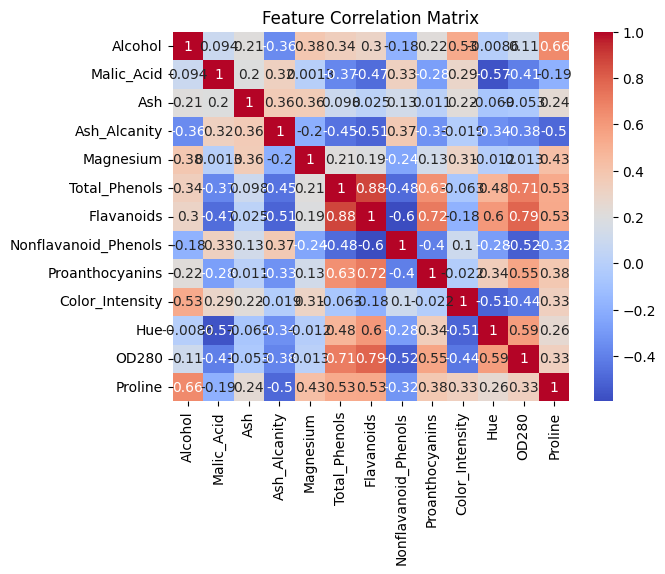

In [19]:
correlation_matrix = wine_data.drop(columns=["Customer_Segment"]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [5]:
X = wine_data.drop(columns=["Customer_Segment"])
y = wine_data["Customer_Segment"]


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [8]:
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["Customer_Segment"] = y


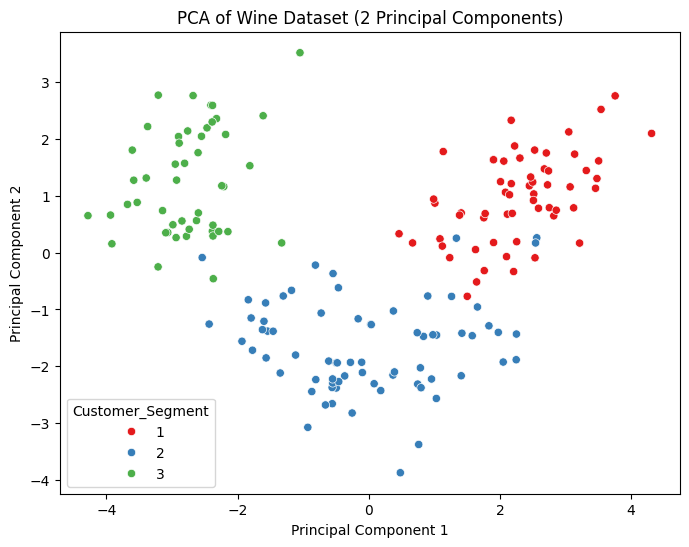

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue="Customer_Segment", palette="Set1", data=pca_df)
plt.title("PCA of Wine Dataset (2 Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [10]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each principal component: ", explained_variance)

Explained variance by each principal component:  [0.36198848 0.1920749 ]
